In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors as neighbors
from matplotlib import colors
from scipy.stats import multivariate_normal
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression

from sklearn.neural_network import MLPRegressor
#MLPRegressor 代表 Multi-Layer Perceptron Regressor。而 MultiLayer Perceptron 便是像圖 1 的多層神經元（感知器 perceptrons）的架構
#Regressor 代表其輸出/輸入的關係同於迴歸模型的概念(輸出與輸入皆是連續型資料)
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform
from scipy.special import gammainc
import neurolab as nl
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 函式

In [26]:
def GenDataforN(seed, n_list, mu_list, Cov_list):
    rng = np.random.default_rng(seed=seed)
    X_list, y_list = [], []

    for i, n in enumerate(n_list):
        mvn = rng.multivariate_normal(mean=mu_list[i], cov=Cov_list[i], size=n)
        X_list.append(mvn)
        y_list.append(np.full(n, i))

    X = np.vstack(X_list)
    y = np.hstack(y_list)
    return X, y

#切割訓練與測試資料
#X = D[:, 0:2]
#Y = D[:, 2]
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#D_train = np.hstack((X_train, Y_train.reshape(-1, 1)))
#D_test = np.hstack((X_test, Y_test.reshape(-1, 1)))

### data1

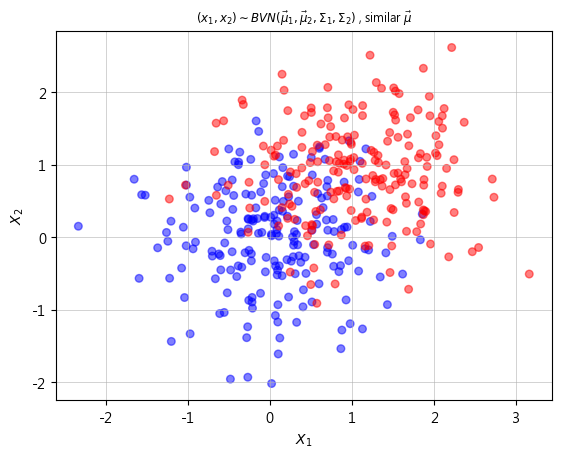

In [47]:
X,y= GenDataforN(seed = 123 , n_list =[200,200]
            , mu_list = [np.array([0, 0]) , np.array([1, 1])]
            , Cov_list = [np.array([[0.5, 0], [0, 0.5]])
                          ,np.array([[0.5, 0], [0, 0.5]])] )

plt.grid(True,linewidth = 0.4)
plt.xlabel('$X_1$') ,plt.ylabel('$X_2$')
colors = ['blue' if i == 0 else 'red' for i in y]
plt.scatter(X[:, 0], X[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
plt.title(f'$(x_1,x_2)\sim BVN(\\vec\mu_1,\\vec\mu_2,\\Sigma_1,\\Sigma_2)$ , similar $\\vec\mu$' ,fontsize = 8.5)

plt.savefig('statcomp_hw7_plot1.png')


In [28]:
Lda = LinearDiscriminantAnalysis(tol=1e-6)

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)

K5 = 5
weights = 'uniform'
Knn5 = neighbors.KNeighborsClassifier(K5, weights = weights)

K15 = 15
weights = 'uniform'
Knn15 = neighbors.KNeighborsClassifier(K15, weights = weights)

# # bootstraping LDA & QDA & KNN5 & KNN15 --------------
K1 = 100
LDA_trainingErr = np.zeros(K1)
LDA_testErr = np.zeros(K1)
QDA_trainingErr = np.zeros(K1)
QDA_testErr = np.zeros(K1)
KNN5_trainingErr = np.zeros(K1)
KNN5_testErr = np.zeros(K1)
KNN15_trainingErr = np.zeros(K1)
KNN15_testErr = np.zeros(K1)

for i in range (K1):
    X_train , X_test , y_train , y_test = train_test_split (X ,y,test_size = 0.3)

    Lda.fit (X_train , y_train)
    LDA_trainingErr[i] = 1- Lda.score(X_train, y_train)
    LDA_testErr[i] = 1 - Lda.score(X_test , y_test)

    Qda.fit (X_train , y_train)
    QDA_trainingErr[i] = 1- Qda.score(X_train, y_train)
    QDA_testErr[i] = 1 - Qda.score(X_test , y_test)

    Knn5.fit (X_train , y_train)
    KNN5_trainingErr[i] = 1- Knn5.score(X_train, y_train)
    KNN5_testErr[i] = 1 - Knn5.score(X_test , y_test)

    Knn15.fit (X_train , y_train)
    KNN15_trainingErr[i] = 1- Knn15.score(X_train, y_train)
    KNN15_testErr[i] = 1 - Knn15.score(X_test , y_test)

  
print('Lda training error:{:.4f}'.format(LDA_trainingErr.mean()))
print('Lda testing error:{:.4f}'.format(LDA_testErr.mean()))

print('Qda training error:{:.4f}'.format(QDA_trainingErr.mean()))
print('Qda testing error:{:.4f}'.format(QDA_testErr.mean()))

print('Knn5 training error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('Knn5 testing error:{:.4f}'.format(KNN5_testErr.mean()))

print('Knn15 training error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('Knn15 testing error:{:.4f}'.format(KNN15_testErr.mean()))

#------------------------------------
opts = dict(max_iter = 10000, solver = 'adam', verbose = False,activation = 'logistic', tol = 1e-6)
Ann10 = MLPClassifier(hidden_layer_sizes = (10,), **opts)
Ann20 = MLPClassifier(hidden_layer_sizes = (20,), **opts)
ANN10_trainingErr = np.zeros(K1)
ANN10_testErr = np.zeros(K1)
ANN20_trainingErr = np.zeros(K1)
ANN20_testErr = np.zeros(K1)

for i in range (K1):
    X_train , X_test , y_train , y_test = train_test_split (X ,y,test_size = 0.2)
    Ann10.fit(X_train , y_train)
    ANN10_trainingErr[i]  = 1 - Ann10.score(X_train, y_train)
    ANN10_testErr[i] = 1 - Ann10.score(X_test , y_test)

    Ann20.fit(X_train , y_train)
    ANN20_trainingErr[i]  = 1 - Ann20.score(X_train, y_train)
    ANN20_testErr[i] = 1 - Ann20.score(X_test , y_test)
print('Ann10 training error:{:.4f}'.format(ANN10_trainingErr.mean()))
print('Ann10 testing error:{:.4f}'.format(ANN10_testErr.mean()))
print('Ann20 training error:{:.4f}'.format(ANN20_trainingErr.mean()))
print('Ann20 testing error:{:.4f}'.format(ANN20_testErr.mean()))

Lda training error:0.1750
Lda testing error:0.1737
Qda training error:0.1736
Qda testing error:0.1736
Knn5 training error:0.1416
Knn5 testing error:0.1948
Knn15 training error:0.1740
Knn15 testing error:0.1936
Ann10 training error:0.1726
Ann10 testing error:0.1746
Ann20 training error:0.1743
Ann20 testing error:0.1753


### data2

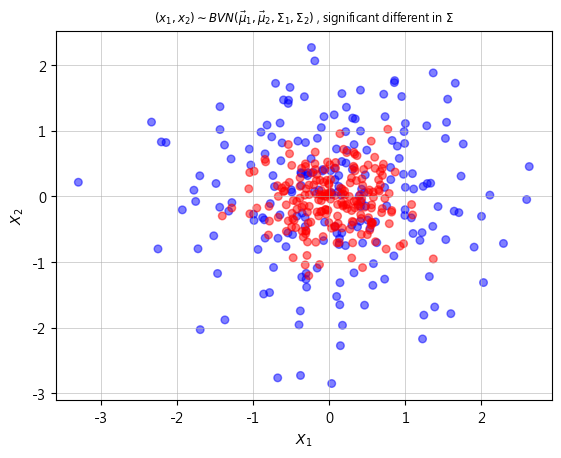

In [48]:
X,y= GenDataforN(seed = 123 , n_list =[200,200]
            , mu_list = [np.array([0, 0]) , np.array([0, 0])]
            , Cov_list = [np.array([[1, 0], [0 , 1]])
                          ,np.array([[0.2, 0], [0, 0.2]])] )

plt.grid(True,linewidth = 0.4)
plt.xlabel('$X_1$') , plt.ylabel('$X_2$')
colors = ['blue' if i == 0 else 'red' for i in y]
plt.scatter(X[:, 0], X[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
plt.title(f'$(x_1,x_2)\sim BVN(\\vec\mu_1,\\vec\mu_2,\\Sigma_1,\\Sigma_2)$ , significant different in $\\Sigma$' ,fontsize = 8.5)

plt.savefig('statcomp_hw7_plot2.png')

In [30]:
Lda = LinearDiscriminantAnalysis(tol=1e-6)

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)

K5 = 5
weights = 'uniform'
Knn5 = neighbors.KNeighborsClassifier(K5, weights = weights)

K15 = 15
weights = 'uniform'
Knn15 = neighbors.KNeighborsClassifier(K15, weights = weights)

# # bootstraping LDA & QDA & KNN5 & KNN15 --------------
K1 = 100
LDA_trainingErr = np.zeros(K1)
LDA_testErr = np.zeros(K1)
QDA_trainingErr = np.zeros(K1)
QDA_testErr = np.zeros(K1)
KNN5_trainingErr = np.zeros(K1)
KNN5_testErr = np.zeros(K1)
KNN15_trainingErr = np.zeros(K1)
KNN15_testErr = np.zeros(K1)

for i in range (K1):
    X_train , X_test , y_train , y_test = train_test_split (X ,y,test_size = 0.3)

    Lda.fit (X_train , y_train)
    LDA_trainingErr[i] = 1- Lda.score(X_train, y_train)
    LDA_testErr[i] = 1 - Lda.score(X_test , y_test)

    Qda.fit (X_train , y_train)
    QDA_trainingErr[i] = 1- Qda.score(X_train, y_train)
    QDA_testErr[i] = 1 - Qda.score(X_test , y_test)

    Knn5.fit (X_train , y_train)
    KNN5_trainingErr[i] = 1- Knn5.score(X_train, y_train)
    KNN5_testErr[i] = 1 - Knn5.score(X_test , y_test)

    Knn15.fit (X_train , y_train)
    KNN15_trainingErr[i] = 1- Knn15.score(X_train, y_train)
    KNN15_testErr[i] = 1 - Knn15.score(X_test , y_test)

  
print('Lda training error:{:.4f}'.format(LDA_trainingErr.mean()))
print('Lda testing error:{:.4f}'.format(LDA_testErr.mean()))

print('Qda training error:{:.4f}'.format(QDA_trainingErr.mean()))
print('Qda testing error:{:.4f}'.format(QDA_testErr.mean()))

print('Knn5 training error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('Knn5 testing error:{:.4f}'.format(KNN5_testErr.mean()))

print('Knn15 training error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('Knn15 testing error:{:.4f}'.format(KNN15_testErr.mean()))

#------------------------------------
opts = dict(max_iter = 10000, solver = 'adam', verbose = False,activation = 'logistic', tol = 1e-6)
Ann10 = MLPClassifier(hidden_layer_sizes = (10,), **opts)
Ann20 = MLPClassifier(hidden_layer_sizes = (20,), **opts)
ANN10_trainingErr = np.zeros(K1)
ANN10_testErr = np.zeros(K1)
ANN20_trainingErr = np.zeros(K1)
ANN20_testErr = np.zeros(K1)

for i in range (K1):
    X_train , X_test , y_train , y_test = train_test_split (X ,y,test_size = 0.2)
    Ann10.fit(X_train , y_train)
    ANN10_trainingErr[i]  = 1 - Ann10.score(X_train, y_train)
    ANN10_testErr[i] = 1 - Ann10.score(X_test , y_test)

    Ann20.fit(X_train , y_train)
    ANN20_trainingErr[i]  = 1 - Ann20.score(X_train, y_train)
    ANN20_testErr[i] = 1 - Ann20.score(X_test , y_test)
print('Ann10 training error:{:.4f}'.format(ANN10_trainingErr.mean()))
print('Ann10 testing error:{:.4f}'.format(ANN10_testErr.mean()))
print('Ann20 training error:{:.4f}'.format(ANN20_trainingErr.mean()))
print('Ann20 testing error:{:.4f}'.format(ANN20_testErr.mean()))

Lda training error:0.4658
Lda testing error:0.5225
Qda training error:0.2431
Qda testing error:0.2444
Knn5 training error:0.2022
Knn5 testing error:0.2905
Knn15 training error:0.2338
Knn15 testing error:0.2631


c:\Users\yangs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Ann10 training error:0.2472
Ann10 testing error:0.2570
Ann20 training error:0.3175
Ann20 testing error:0.3367


### data3

C:\Users\yangs\AppData\Local\Temp\ipykernel_4260\3912426873.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  mvn = rng.multivariate_normal(mean=mu_list[i], cov=Cov_list[i], size=n)


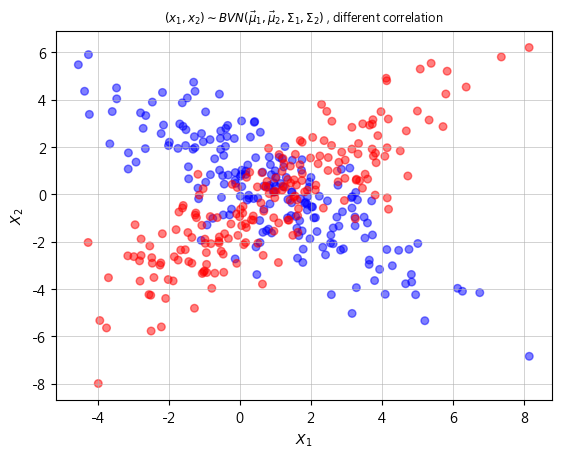

In [49]:
X,y= GenDataforN(seed = 123 , n_list =[200,200]
            , mu_list = [np.array([1, 0]) , np.array([1, 0])]
            , Cov_list = [np.array([[4, -5], [-5, 4]])
                          ,np.array([[4, 5], [5, 4]])] )

plt.grid(True,linewidth = 0.4)
plt.xlabel('$X_1$') , plt.ylabel('$X_2$')
colors = ['blue' if i == 0 else 'red' for i in y]
plt.scatter(X[:, 0], X[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
plt.title(f'$(x_1,x_2)\sim BVN(\\vec\mu_1,\\vec\mu_2,\\Sigma_1,\\Sigma_2)$ , different correlation' ,fontsize = 8.5)

plt.savefig('statcomp_hw7_plot3.png')

In [32]:
Lda = LinearDiscriminantAnalysis(tol=1e-6)

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)

K5 = 5
weights = 'uniform'
Knn5 = neighbors.KNeighborsClassifier(K5, weights = weights)

K15 = 15
weights = 'uniform'
Knn15 = neighbors.KNeighborsClassifier(K15, weights = weights)

# # bootstraping LDA & QDA & KNN5 & KNN15 --------------
K1 = 100
LDA_trainingErr = np.zeros(K1)
LDA_testErr = np.zeros(K1)
QDA_trainingErr = np.zeros(K1)
QDA_testErr = np.zeros(K1)
KNN5_trainingErr = np.zeros(K1)
KNN5_testErr = np.zeros(K1)
KNN15_trainingErr = np.zeros(K1)
KNN15_testErr = np.zeros(K1)

for i in range (K1):
    X_train , X_test , y_train , y_test = train_test_split (X ,y,test_size = 0.3)

    Lda.fit (X_train , y_train)
    LDA_trainingErr[i] = 1- Lda.score(X_train, y_train)
    LDA_testErr[i] = 1 - Lda.score(X_test , y_test)

    Qda.fit (X_train , y_train)
    QDA_trainingErr[i] = 1- Qda.score(X_train, y_train)
    QDA_testErr[i] = 1 - Qda.score(X_test , y_test)

    Knn5.fit (X_train , y_train)
    KNN5_trainingErr[i] = 1- Knn5.score(X_train, y_train)
    KNN5_testErr[i] = 1 - Knn5.score(X_test , y_test)

    Knn15.fit (X_train , y_train)
    KNN15_trainingErr[i] = 1- Knn15.score(X_train, y_train)
    KNN15_testErr[i] = 1 - Knn15.score(X_test , y_test)

  
print('Lda training error:{:.4f}'.format(LDA_trainingErr.mean()))
print('Lda testing error:{:.4f}'.format(LDA_testErr.mean()))

print('Qda training error:{:.4f}'.format(QDA_trainingErr.mean()))
print('Qda testing error:{:.4f}'.format(QDA_testErr.mean()))

print('Knn5 training error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('Knn5 testing error:{:.4f}'.format(KNN5_testErr.mean()))

print('Knn15 training error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('Knn15 testing error:{:.4f}'.format(KNN15_testErr.mean()))

#------------------------------------
opts = dict(max_iter = 10000, solver = 'adam', verbose = False,activation = 'logistic', tol = 1e-6)
Ann10 = MLPClassifier(hidden_layer_sizes = (10,), **opts)
Ann20 = MLPClassifier(hidden_layer_sizes = (20,), **opts)
ANN10_trainingErr = np.zeros(K1)
ANN10_testErr = np.zeros(K1)
ANN20_trainingErr = np.zeros(K1)
ANN20_testErr = np.zeros(K1)

for i in range (K1):
    X_train , X_test , y_train , y_test = train_test_split (X ,y,test_size = 0.2)
    Ann10.fit(X_train , y_train)
    ANN10_trainingErr[i]  = 1 - Ann10.score(X_train, y_train)
    ANN10_testErr[i] = 1 - Ann10.score(X_test , y_test)

    Ann20.fit(X_train , y_train)
    ANN20_trainingErr[i]  = 1 - Ann20.score(X_train, y_train)
    ANN20_testErr[i] = 1 - Ann20.score(X_test , y_test)
print('Ann10 training error:{:.4f}'.format(ANN10_trainingErr.mean()))
print('Ann10 testing error:{:.4f}'.format(ANN10_testErr.mean()))
print('Ann20 training error:{:.4f}'.format(ANN20_trainingErr.mean()))
print('Ann20 testing error:{:.4f}'.format(ANN20_testErr.mean()))

Lda training error:0.4517
Lda testing error:0.4819
Qda training error:0.1841
Qda testing error:0.1878
Knn5 training error:0.1487
Knn5 testing error:0.2141
Knn15 training error:0.1857
Knn15 testing error:0.2193


c:\Users\yangs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Ann10 training error:0.1840
Ann10 testing error:0.2034
Ann20 training error:0.1798
Ann20 testing error:0.1962


### data 4

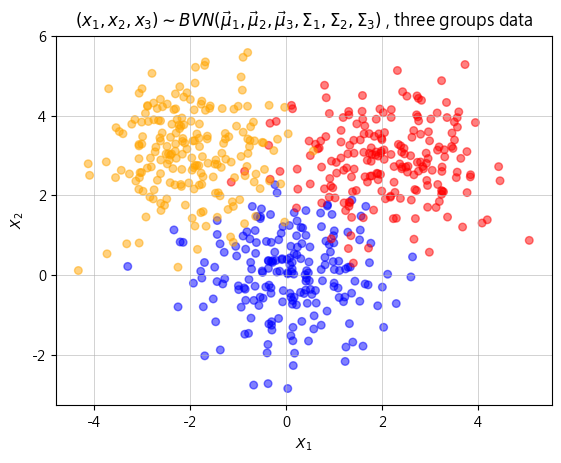

In [50]:
X,y= GenDataforN(seed = 123 , n_list =[200,200,200]
            , mu_list = [np.array([0, 0]) , np.array([2, 3]) , np.array([-2, 3])]
            , Cov_list = [np.array([[1, 0], [0, 1]])
                          ,np.array([[1, 0], [0, 1]])
                          ,np.array([[1, 0], [0, 1]])
                          ] )

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)
ax.set_xlabel('$X_1$') , ax.set_ylabel('$X_2$')
colors = ['blue' if i == 0 else 'red' if i==1 else 'orange' for i in y]
plot = ax.scatter(X[:, 0], X[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
plt.title(f'$(x_1,x_2,x_3)\sim BVN(\\vec\mu_1,\\vec\mu_2,\\vec\mu_3,\\Sigma_1,\\Sigma_2,\\Sigma_3)$ , three groups data' )

plt.savefig('statcomp_hw7_plot4.png')

In [34]:
Lda = LinearDiscriminantAnalysis(tol=1e-6)

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)

K5 = 5
weights = 'uniform'
Knn5 = neighbors.KNeighborsClassifier(K5, weights = weights)

K15 = 15
weights = 'uniform'
Knn15 = neighbors.KNeighborsClassifier(K15, weights = weights)

# # bootstraping LDA & QDA & KNN5 & KNN15 --------------
K1 = 100
LDA_trainingErr = np.zeros(K1)
LDA_testErr = np.zeros(K1)
QDA_trainingErr = np.zeros(K1)
QDA_testErr = np.zeros(K1)
KNN5_trainingErr = np.zeros(K1)
KNN5_testErr = np.zeros(K1)
KNN15_trainingErr = np.zeros(K1)
KNN15_testErr = np.zeros(K1)

for i in range (K1):
    X_train , X_test , y_train , y_test = train_test_split (X ,y,test_size = 0.3)

    Lda.fit (X_train , y_train)
    LDA_trainingErr[i] = 1- Lda.score(X_train, y_train)
    LDA_testErr[i] = 1 - Lda.score(X_test , y_test)

    Qda.fit (X_train , y_train)
    QDA_trainingErr[i] = 1- Qda.score(X_train, y_train)
    QDA_testErr[i] = 1 - Qda.score(X_test , y_test)

    Knn5.fit (X_train , y_train)
    KNN5_trainingErr[i] = 1- Knn5.score(X_train, y_train)
    KNN5_testErr[i] = 1 - Knn5.score(X_test , y_test)

    Knn15.fit (X_train , y_train)
    KNN15_trainingErr[i] = 1- Knn15.score(X_train, y_train)
    KNN15_testErr[i] = 1 - Knn15.score(X_test , y_test)

  
print('Lda training error:{:.4f}'.format(LDA_trainingErr.mean()))
print('Lda testing error:{:.4f}'.format(LDA_testErr.mean()))

print('Qda training error:{:.4f}'.format(QDA_trainingErr.mean()))
print('Qda testing error:{:.4f}'.format(QDA_testErr.mean()))

print('Knn5 training error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('Knn5 testing error:{:.4f}'.format(KNN5_testErr.mean()))

print('Knn15 training error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('Knn15 testing error:{:.4f}'.format(KNN15_testErr.mean()))

#------------------------------------
opts = dict(max_iter = 10000, solver = 'adam', verbose = False,activation = 'logistic', tol = 1e-6)
Ann10 = MLPClassifier(hidden_layer_sizes = (10,), **opts)
Ann20 = MLPClassifier(hidden_layer_sizes = (20,), **opts)
ANN10_trainingErr = np.zeros(K1)
ANN10_testErr = np.zeros(K1)
ANN20_trainingErr = np.zeros(K1)
ANN20_testErr = np.zeros(K1)

for i in range (K1):
    X_train , X_test , y_train , y_test = train_test_split (X ,y,test_size = 0.2)
    Ann10.fit(X_train , y_train)
    ANN10_trainingErr[i]  = 1 - Ann10.score(X_train, y_train)
    ANN10_testErr[i] = 1 - Ann10.score(X_test , y_test)

    Ann20.fit(X_train , y_train)
    ANN20_trainingErr[i]  = 1 - Ann20.score(X_train, y_train)
    ANN20_testErr[i] = 1 - Ann20.score(X_test , y_test)
print('Ann10 training error:{:.4f}'.format(ANN10_trainingErr.mean()))
print('Ann10 testing error:{:.4f}'.format(ANN10_testErr.mean()))
print('Ann20 training error:{:.4f}'.format(ANN20_trainingErr.mean()))
print('Ann20 testing error:{:.4f}'.format(ANN20_testErr.mean()))

Lda training error:0.0600
Lda testing error:0.0615
Qda training error:0.0571
Qda testing error:0.0607
Knn5 training error:0.0531
Knn5 testing error:0.0730
Knn15 training error:0.0583
Knn15 testing error:0.0657
Ann10 training error:0.0612
Ann10 testing error:0.0661
Ann20 training error:0.0619
Ann20 testing error:0.0661


train error

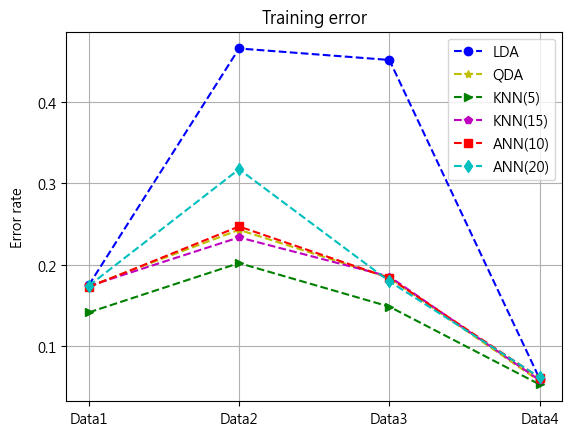

In [51]:
from matplotlib.font_manager import FontProperties

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(facecolor='white')
x=['Data1','Data2','Data3','Data4']
y1=[0.1750,0.4658,0.4517,0.0600]
plt.plot(x,y1,'b--o',label='LDA')
y2=[0.1736,0.2431,0.1841,0.0571]
plt.plot(x,y2,'y--*',label='QDA')
y3=[0.1416,0.2022,0.1487,0.0531]
plt.plot(x,y3,'g-->',label='KNN(5)')
y4=[0.1740,0.2338,0.1857,0.0583]
plt.plot(x,y4,'m--p',label='KNN(15)')
y5=[0.1726,0.2472,0.1840,0.0612]
plt.plot(x,y5,'r--s',label='ANN(10)')
y6=[0.1743,0.3175,0.1798,0.0619]
plt.plot(x,y6,'c--d',label='ANN(20)')
plt.ylabel('Error rate',labelpad=8)
plt.legend()
plt.grid(True)
plt.title('Training error')

plt.savefig('statcomp_hw7_plot5.png')

test error 

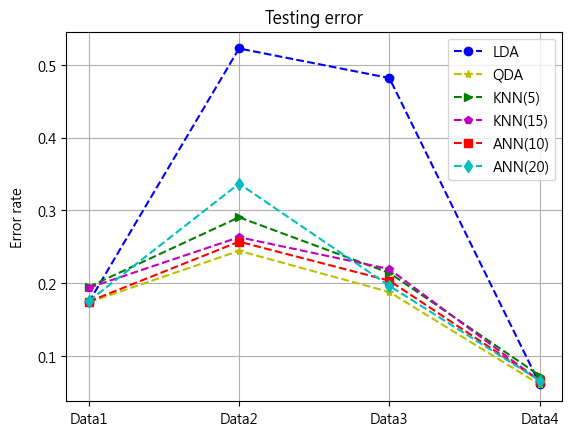

In [52]:
from matplotlib.font_manager import FontProperties

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(facecolor='white')
x=['Data1','Data2','Data3','Data4']
y1=[0.1737,0.5225,0.4819,0.0615]
plt.plot(x,y1,'b--o',label='LDA')
y2=[0.1736,0.2444,0.1878,0.0607]
plt.plot(x,y2,'y--*',label='QDA')
y3=[0.1948,0.2905,0.2141,0.0730]
plt.plot(x,y3,'g-->',label='KNN(5)')
y4=[0.1936,0.2631,0.2193,0.0657]
plt.plot(x,y4,'m--p',label='KNN(15)')
y5=[0.1746,0.2570,0.2034,0.0661]
plt.plot(x,y5,'r--s',label='ANN(10)')
y6=[0.1753,0.3367,0.1962,0.0661]
plt.plot(x,y6,'c--d',label='ANN(20)')
plt.ylabel('Error rate',labelpad=8)
plt.legend()
plt.grid(True)
plt.title('Testing error')

plt.savefig('statcomp_hw7_plot6.png')